In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

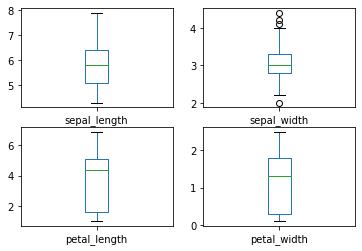

In [7]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [8]:
Q1=iris['sepal_width'].quantile(0.25)
Q3=iris['sepal_width'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.8
3.3
0.5
2.05 4.05


In [9]:
iris = iris[iris['sepal_width']< Upper_Whisker]

In [11]:
iris.shape

(147, 5)

<AxesSubplot:xlabel='sepal_width'>

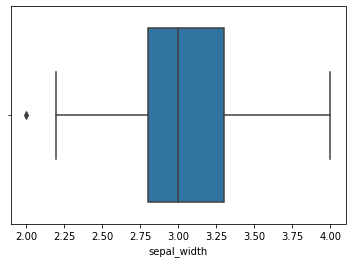

In [12]:
sns.boxplot(x=iris['sepal_width'])

In [13]:
iris = iris[iris['sepal_width']> Lower_Whisker]

In [14]:
iris.shape

(146, 5)

<AxesSubplot:xlabel='sepal_width'>

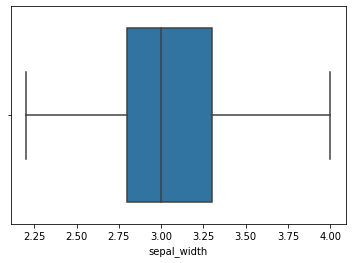

In [15]:
sns.boxplot(x=iris['sepal_width'])

c:\users\mahes\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


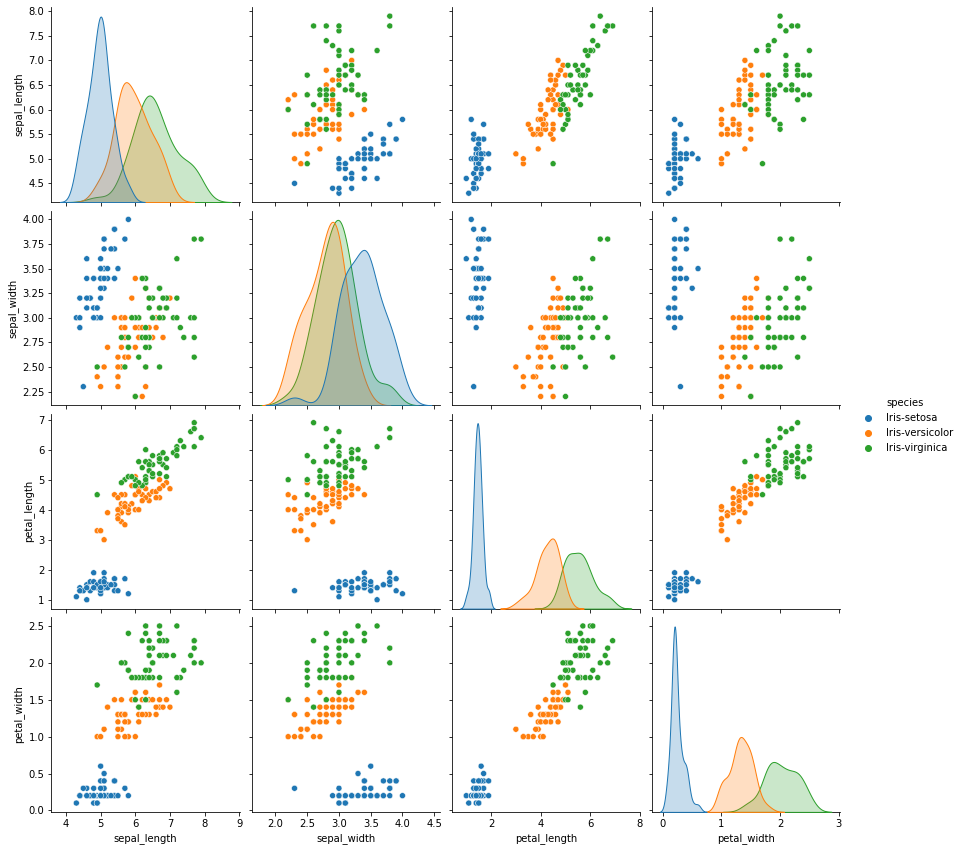

In [21]:
sns.pairplot(iris, hue="species", size=3, diag_kind="kde")
plt.show()

<AxesSubplot:>

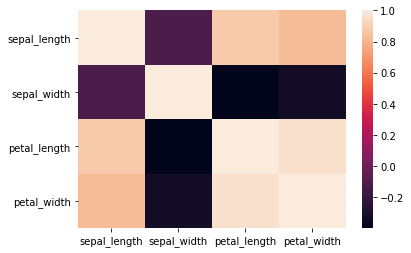

In [16]:
sns.heatmap(iris.corr())

In [17]:
use_feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[use_feature]
y = iris['species']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)

In [25]:
metrics.confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 14]], dtype=int64)

In [26]:
metrics.accuracy_score(y_test, y_pred)

0.9545454545454546

In [27]:
len(X_test)

44

In [28]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.95        44
   weighted avg       0.96      0.95      0.95        44



In [29]:
lr.coef_

array([[-0.48157017,  0.71195558, -2.24222871, -0.99531837],
       [ 0.54573518, -0.39047089, -0.16950083, -0.85227073],
       [-0.06416501, -0.32148469,  2.41172953,  1.8475891 ]])

In [30]:
lr.intercept_

array([  9.75789726,   1.8395825 , -11.59747976])

In [31]:
lr.predict_proba(X_test)

array([[6.32363128e-06, 3.42712468e-02, 9.65722430e-01],
       [3.15477323e-03, 3.91708649e-01, 6.05136578e-01],
       [4.85051213e-03, 6.42574766e-01, 3.52574722e-01],
       [7.76059969e-02, 9.16220332e-01, 6.17367148e-03],
       [1.06865574e-05, 6.06793523e-02, 9.39309961e-01],
       [7.79457764e-03, 7.67973975e-01, 2.24231448e-01],
       [9.93983980e-04, 3.97412857e-01, 6.01593159e-01],
       [2.08718695e-05, 3.74225455e-02, 9.62556583e-01],
       [9.77904526e-01, 2.20953192e-02, 1.54891286e-07],
       [1.37375866e-02, 9.67072949e-01, 1.91894647e-02],
       [9.56455706e-01, 4.35435622e-02, 7.32036831e-07],
       [9.73216221e-01, 2.67835936e-02, 1.85096807e-07],
       [2.09667503e-02, 8.91050098e-01, 8.79831516e-02],
       [9.79240320e-01, 2.07596356e-02, 4.41428454e-08],
       [4.94062019e-04, 1.81474166e-01, 8.18031772e-01],
       [9.67812773e-01, 3.21871237e-02, 1.02779595e-07],
       [1.36313800e-06, 1.93320586e-02, 9.80666578e-01],
       [9.55203168e-01, 4.47963

In [33]:
X_new = np.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


In [34]:
y_pred = lr.predict(X_new)

In [35]:
print("Prediction of Species: {}".format(y_pred))

Prediction of Species: ['Iris-versicolor' 'Iris-setosa']
